In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\SRIPRIYA\\Class-21\\Time series\\TSA_COURSE_NOTEBOOKS'

In [3]:
df=pd.read_csv('../../Datasets/AirPassengers.csv')

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
 df.shape

(144, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [8]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

# DATASET LOADING

In [9]:
df=pd.read_csv('../../Datasets/AirPassengers.csv',index_col='Month',parse_dates=True)

In [10]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
df.index.freq='MS'

In [13]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

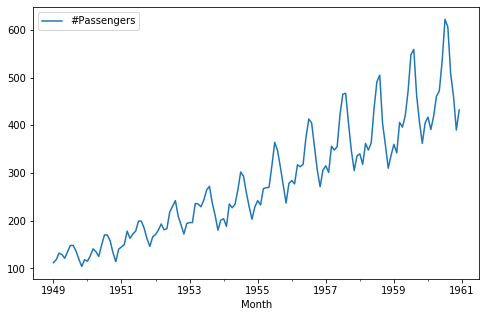

In [14]:
df.plot(figsize=(8,5))

### TIME RESAMPLING

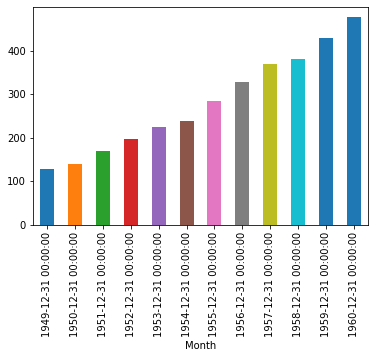

In [15]:
df['#Passengers'].resample('Y').mean().plot(kind='bar')

In [16]:
df['#Passengers'].iloc[:12].mean()

126.66666666666667

### ROLLING WINDOWS

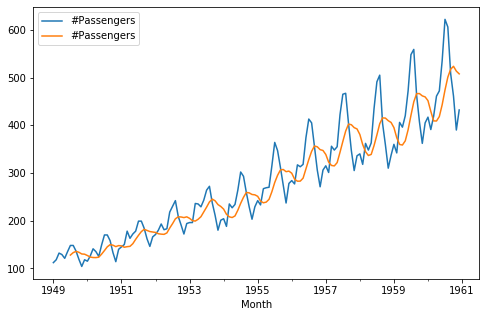

In [17]:
df['#Passengers'].plot(figsize=(8,5),legend=True)
df['#Passengers'].rolling(window=7).mean().plot(legend=True)

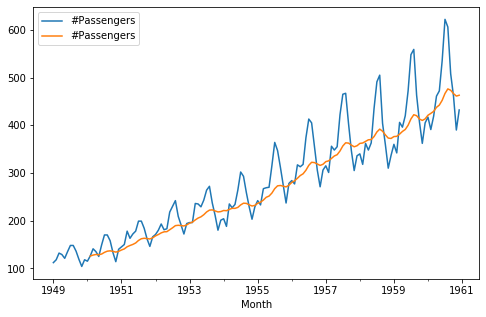

In [18]:
df['#Passengers'].plot(figsize=(8,5),legend=True)
df['#Passengers'].rolling(window=14).mean().plot(legend=True)

### EXPANDING WINDOWS

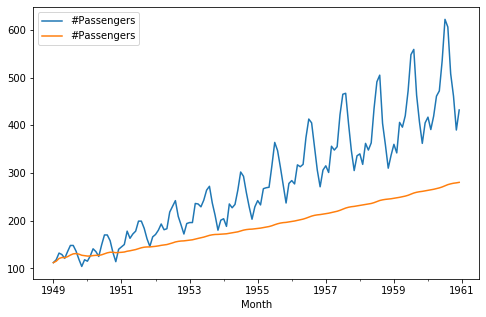

In [19]:
df['#Passengers'].plot(figsize=(8,5),legend=True)
df['#Passengers'].expanding().mean().plot(legend=True)

 ### Hodrick-Prescott Filter

In [20]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [21]:
pas_cycle,pas_trend=hpfilter(df['#Passengers'],lamb=1600)

In [22]:
df1=df.copy()

In [23]:
df1['trend']=pas_trend

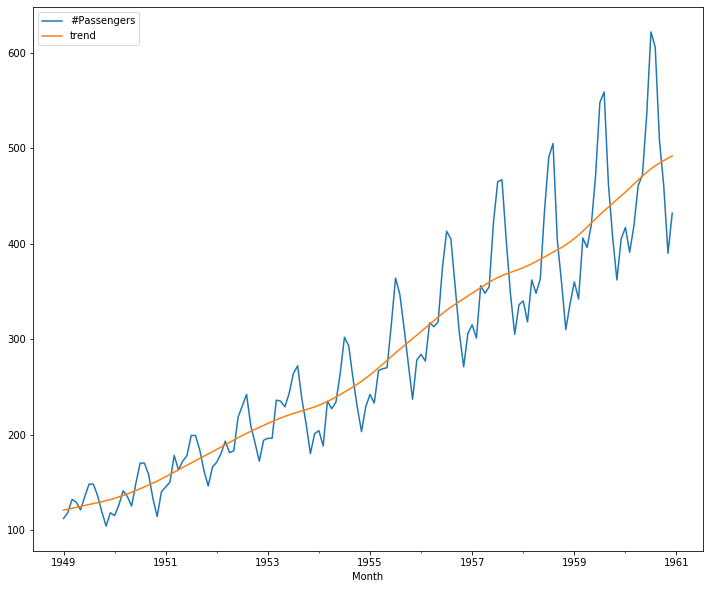

In [24]:
df1[['#Passengers','trend']].plot(figsize=(12,10))

### ETS DECOMPOSITION

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [26]:
result=seasonal_decompose(df['#Passengers'],model='additive')

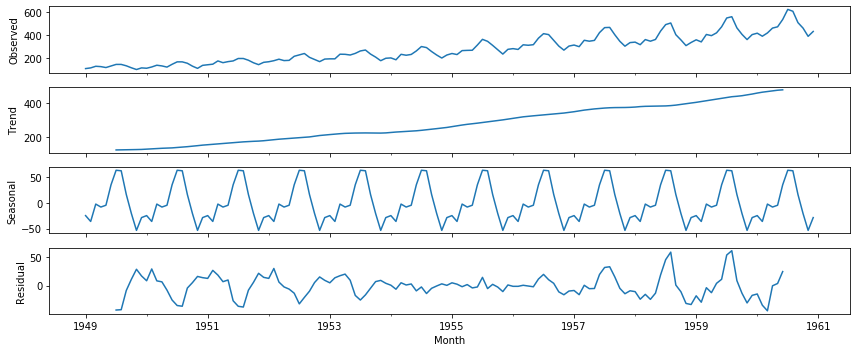

In [27]:
result.plot();

In [28]:
result=seasonal_decompose(df['#Passengers'],model='multiplicative')

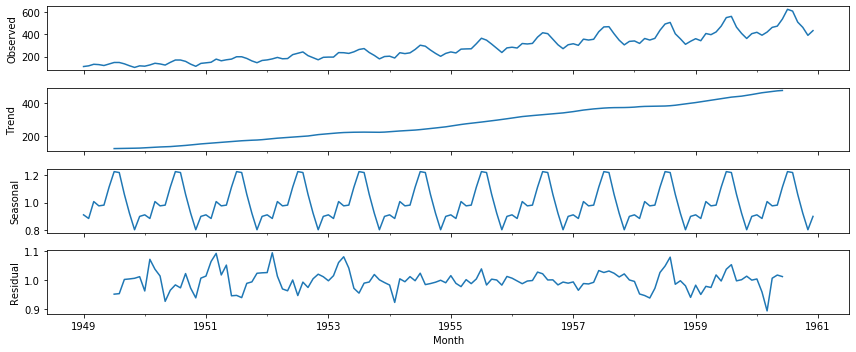

In [29]:
result.plot();

### EWMA MODELS

In [30]:
df1['6 month-SMA']=df1['#Passengers'].rolling(window=6).mean()
df1['12 month-SMA']=df1['#Passengers'].rolling(window=12).mean()
df1['EWMA-6']=df1['#Passengers'].ewm(span=6,adjust=False).mean()
df1['EWMA-12']=df1['#Passengers'].ewm(span=12,adjust=False).mean()


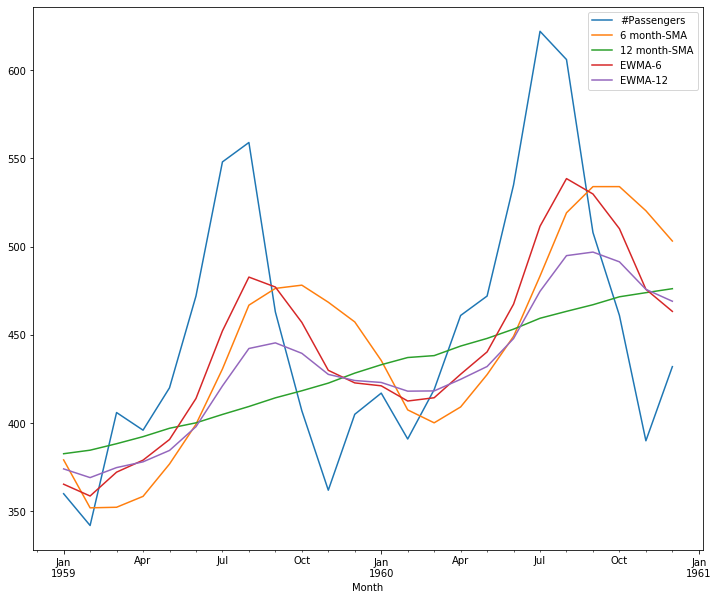

In [31]:
df1[['#Passengers','6 month-SMA','12 month-SMA','EWMA-6','EWMA-12']]['1959-01-01':'1961-01-01'].plot(figsize=(12,10))

### HOLT-WINTERS METHOD

#### Simple Exponential Smoothing

In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [33]:
span=12
alpha=2/(span+1)

#### method 1

In [34]:
df1['EWMA12']=df1['#Passengers'].ewm(alpha=alpha,adjust=False).mean()
df1.head()

,#Passengers,trend,6 month-SMA,12 month-SMA,EWMA-6,EWMA-12,EWMA12
Month,,,,,,,
1949-01-01,112,120.625586,NaN,NaN,112.000000,112.000000,112.000000
1949-02-01,118,121.651911,NaN,NaN,113.714286,112.923077,112.923077
1949-03-01,132,122.672845,NaN,NaN,118.938776,115.857988,115.857988
1949-04-01,129,123.680714,NaN,NaN,121.813411,117.879836,117.879836
1949-05-01,121,124.673675,NaN,NaN,121.581008,118.359861,118.359861


##### method 2 :using statsmodels

In [35]:
model=SimpleExpSmoothing(df['#Passengers']).fit(smoothing_level=alpha,optimized=False)
#fitted_model=model.fit(df['#Passengers'])
df1['SES12']=model.fittedvalues.shift(-1)
#model.

In [36]:
df1.head()

,#Passengers,trend,6 month-SMA,12 month-SMA,EWMA-6,EWMA-12,EWMA12,SES12
Month,,,,,,,,
1949-01-01,112,120.625586,NaN,NaN,112.000000,112.000000,112.000000,112.000000
1949-02-01,118,121.651911,NaN,NaN,113.714286,112.923077,112.923077,112.923077
1949-03-01,132,122.672845,NaN,NaN,118.938776,115.857988,115.857988,115.857988
1949-04-01,129,123.680714,NaN,NaN,121.813411,117.879836,117.879836,117.879836
1949-05-01,121,124.673675,NaN,NaN,121.581008,118.359861,118.359861,118.359861


### DoubleExpSmoothing

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [38]:
df1['DES_add_12']=ExponentialSmoothing(df1['#Passengers'],trend='add').fit().fittedvalues.shift(-1)

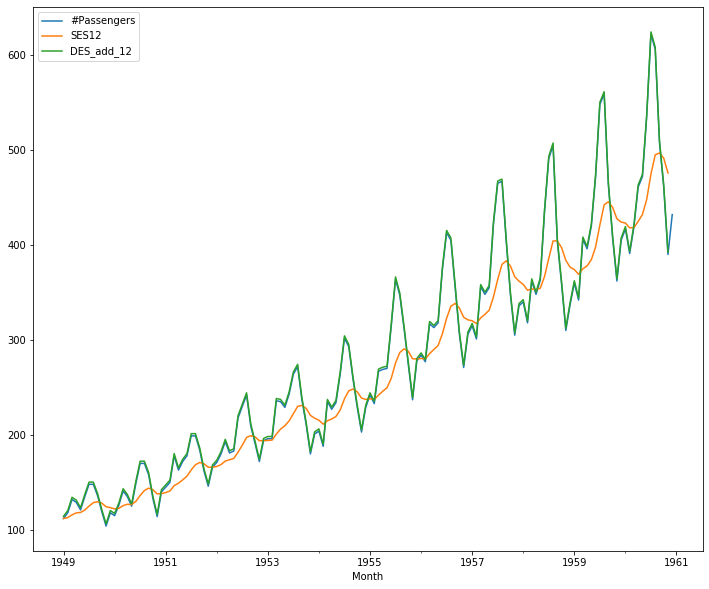

In [55]:
df1[['#Passengers','SES12','DES_add_12']].plot(figsize=(12,10))

### Triple Exponential Smoothing

In [52]:
df1['TES_mul_12']=ExponentialSmoothing(df1['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

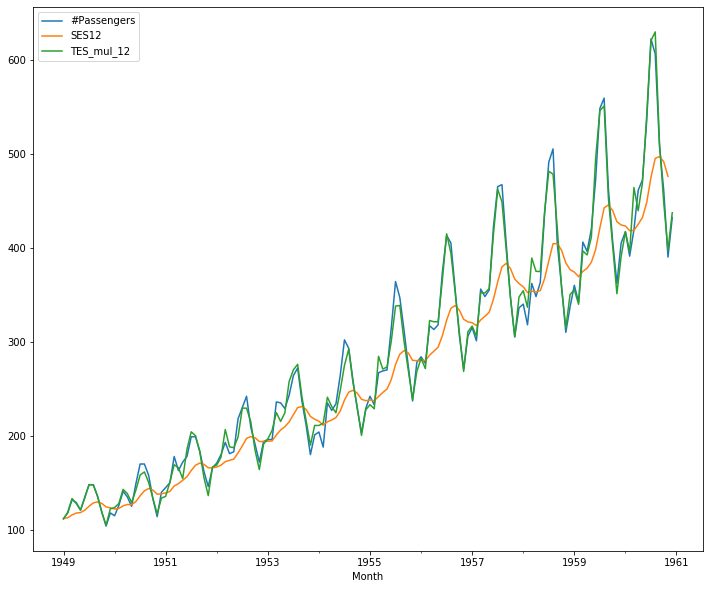

In [56]:
df1[['#Passengers','SES12','TES_mul_12']].plot(figsize=(12,10))

In [57]:
# DES is performing better

## GENERAL FORECASTING METHODS:

## using holt-winters method to forecast for the future 

 ### TES method

In [59]:
train=df.iloc[:109]
test=df.iloc[108:]


In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [103]:
fitted_model=ExponentialSmoothing(train['#Passengers'],trend='mul',seasonal='mul').fit()

In [104]:
test_pred=fitted_model.forecast(36)

In [107]:
test_pred.tail()

1960-09-01    581.523378
1960-10-01    502.300199
1960-11-01    442.631029
1960-12-01    497.113561
1961-01-01    522.863684
Freq: MS, dtype: float64

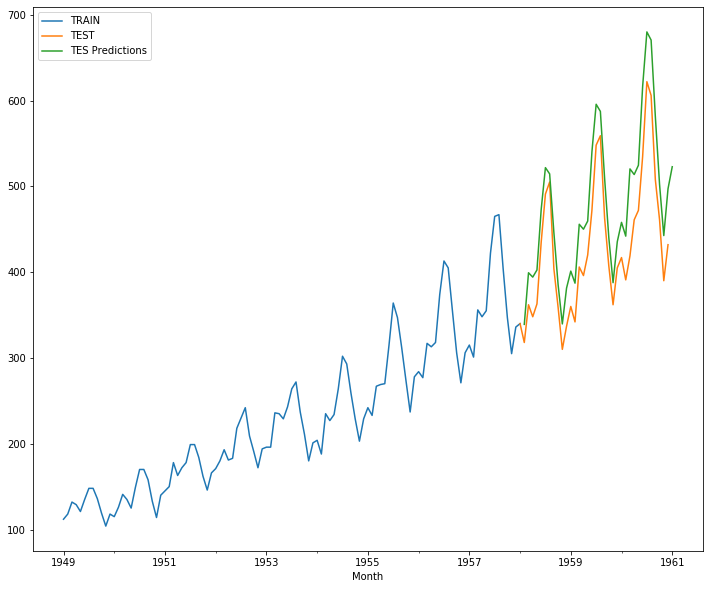

In [105]:
train['#Passengers'].plot(legend=True,figsize=(12,10),label='TRAIN')
test['#Passengers'].plot(legend=True,label='TEST')
test_pred.plot(legend=True,label='TES Predictions')
plt.show()

In [82]:
#using holt-winters (DES) method to forecast for the future 

In [108]:
fitted_modeld=ExponentialSmoothing(train['#Passengers'],trend='add',seasonal='add').fit() #.fittedvalues.shift(-1)

C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [109]:
test_predd=fitted_modeld.forecast(36)

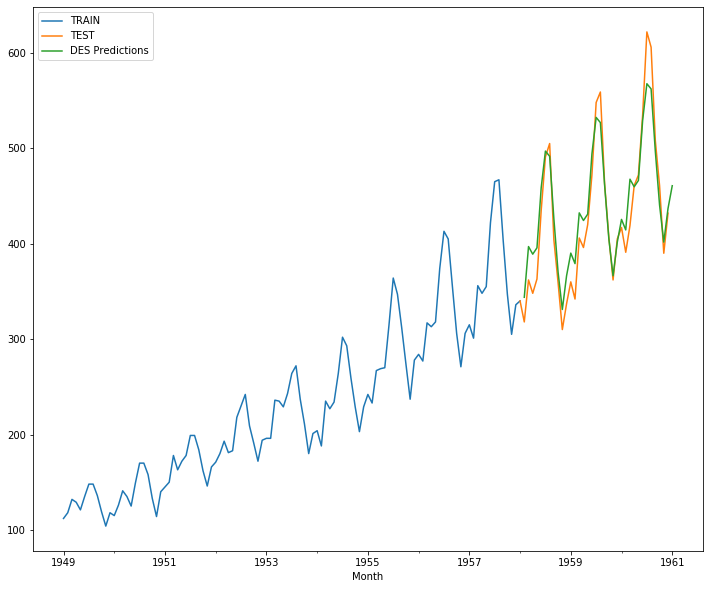

In [110]:
train['#Passengers'].plot(legend=True,figsize=(12,10),label='TRAIN')
test['#Passengers'].plot(legend=True,label='TEST')
test_predd.plot(legend=True,label='DES Predictions')
plt.show()

In [76]:
# EVALUATION 

In [77]:
from sklearn.metrics import mean_squared_error

In [111]:
mean_squared_error(test['#Passengers'],test_pred) #TES

5614.4207149269

In [112]:
mean_squared_error(test['#Passengers'],test_predd) #DES

3085.1524282060336

In [113]:
# DES method worked well!

In [114]:
# Now forecasting into future

In [115]:
final_modeld=ExponentialSmoothing(df['#Passengers'],trend='add',seasonal='add').fit() #.fittedvalues.shift(-1)

C:\Users\SRIPRIYA\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [118]:
final_predd=final_modeld.forecast(36)

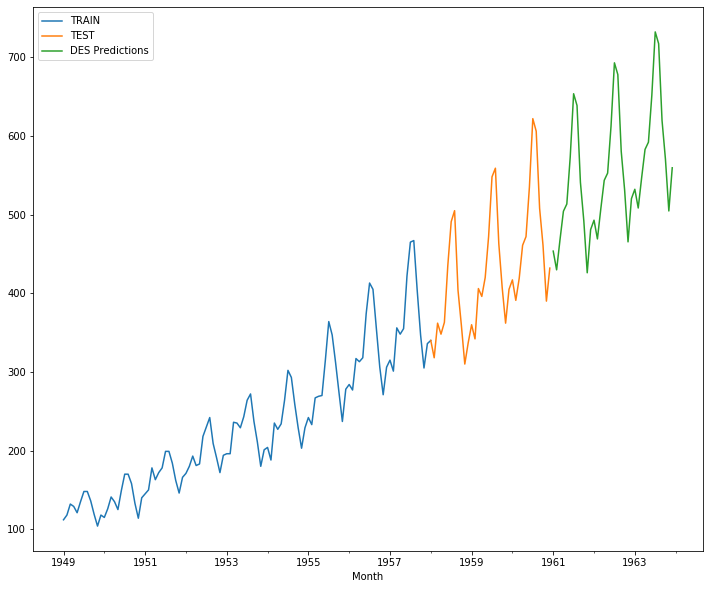

In [119]:
train['#Passengers'].plot(legend=True,figsize=(12,10),label='TRAIN')
test['#Passengers'].plot(legend=True,label='TEST')
final_predd.plot(legend=True,label='DES Predictions')
plt.show()

## Checking for stationarity :

In [175]:
# Time series data is stationary when there is no trend and seasonality
#method 1: by differencing
#method 2: by dickey fuller test
    

In [123]:
from statsmodels.tsa.statespace.tools import diff

In [195]:
df1['d2']=diff(df['#Passengers'],k_diff=2) #.plot()

In [176]:
from statsmodels.tsa.stattools import adfuller

In [179]:
def adf_test(series,title=''):
    print(f'Augmentted Dickey Fuller Test : {title}')
    result=adfuller(series.dropna(),autolag='AIC')
    labels=['ADF test statistic','p-value','# lags used','# observations']
    out=pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value({key})']=val
    print(out.to_string())
    
    if result[1]<=0.05:
        print('strong evidence against the null hypothesis')
        print('reject the null hypothesis')
        print('data has no unit roots and is stationary')

    else:
        print('weak evidence against the null hypothesis')
        print('fail to reject the null hypothesis')
        print('data has a unit root and is non-stationary')

        

In [180]:
adf_test(df1['#Passengers'])

Augmentted Dickey Fuller Test : 
ADF test statistic       0.815369
p-value                  0.991880
# lags used             13.000000
# observations         130.000000
critical value(1%)      -3.481682
critical value(5%)      -2.884042
critical value(10%)     -2.578770
weak evidence against the null hypothesis
fail to reject the null hypothesis
data has a unit root and is non-stationary


In [198]:
adf_test(df1['d2'])

Augmentted Dickey Fuller Test : 
ADF test statistic    -1.638423e+01
p-value                2.732892e-29
# lags used            1.100000e+01
# observations         1.300000e+02
critical value(1%)    -3.481682e+00
critical value(5%)    -2.884042e+00
critical value(10%)   -2.578770e+00
strong evidence against the null hypothesis
reject the null hypothesis
data has no unit roots and is stationary


## ACF & PACF 

In [129]:
# ACF PLOT:

In [130]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

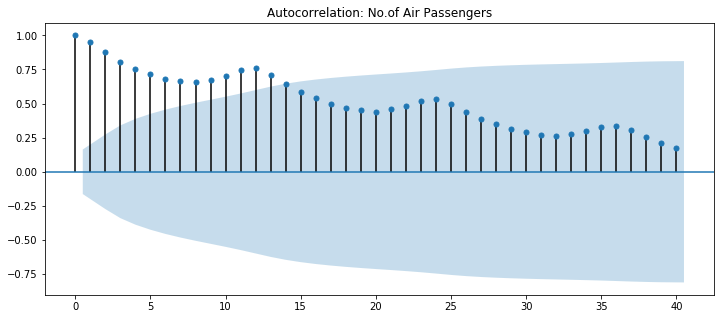

In [132]:
title='Autocorrelation: No.of Air Passengers'
lags=40
plot_acf(df['#Passengers'],title=title,lags=lags);

In [ ]:
# This plot indicates non stationary data as there are large number of lags before ACF Values drop off.

In [133]:
# PACF plot:

In [134]:
# PACF works best with stationary data.Hence apply differencing and make data stationary

In [135]:
df1['d1']=diff(df1['#Passengers'],k_diff=1)

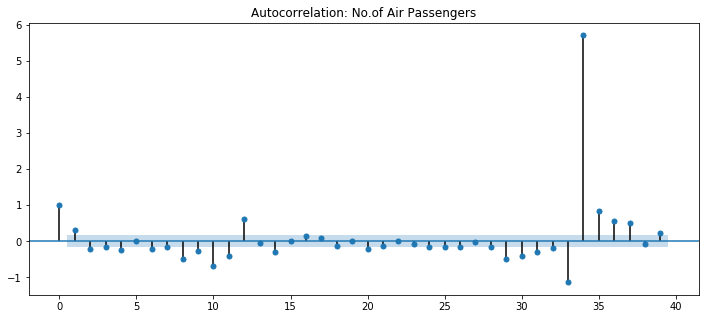

In [206]:
plot_pacf(df1['d1'].dropna(),title=title,lags=np.arange(lags));

## AUTOREGRESSION with Statsmodels

In [246]:
from statsmodels.tsa.ar_model import AR,ARResults

In [247]:
model=AR(train['#Passengers'])
AR1fit=model.fit(maxlag=1)

In [248]:
AR1fit.params

const             12.966234
L1.#Passengers     0.952987
dtype: float64

In [249]:
start=len(train)
end=len(train)+len(test)-1


In [250]:
pred1=AR1fit.predict(start=start,end=end).rename('AR1 Predictions')

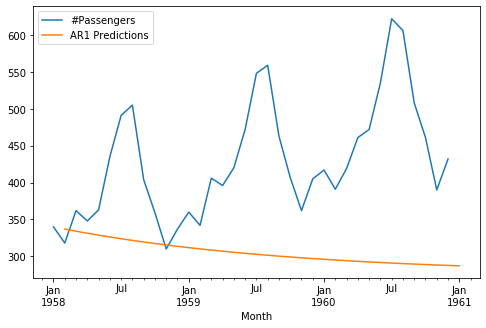

In [251]:
test.plot(figsize=(8,5),legend=True)
pred1.plot(legend=True)

In [252]:
model=AR(df1['#Passengers'])
AR2fit=model.fit(maxlag=2)
pred2=AR2fit.predict(start,end).rename('AR2 Predictions')


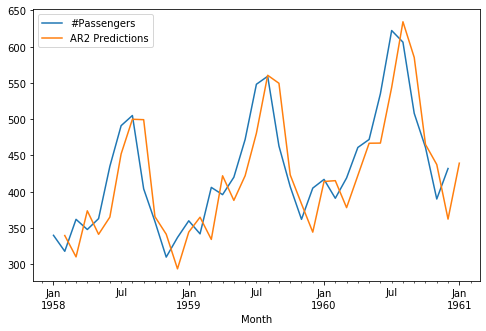

In [253]:
test.plot(figsize=(8,5),legend=True)
pred2.plot(legend=True)

In [254]:
ARfit=model.fit(ic='t-stat')  # we can choose order p for no.of lags using statsmodels

In [255]:
ARfit.params  # 13 lags

const              5.148972
L1.#Passengers     0.760839
L2.#Passengers    -0.085279
L3.#Passengers     0.044238
L4.#Passengers    -0.041790
L5.#Passengers     0.054281
L6.#Passengers    -0.052773
L7.#Passengers     0.033219
L8.#Passengers    -0.099693
L9.#Passengers     0.145556
L10.#Passengers   -0.125891
L11.#Passengers    0.143583
L12.#Passengers    0.907057
L13.#Passengers   -0.665976
dtype: float64

In [256]:
pred13=ARfit.predict(start,end).rename('AR13 Predictions')

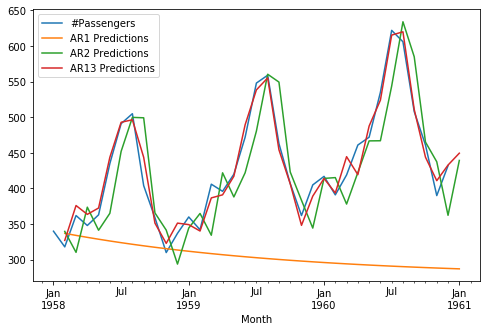

In [257]:
test.plot(figsize=(8,5),legend=True)
pred1.plot(legend=True)
pred2.plot(legend=True)
pred13.plot(legend=True)

In [258]:
labels=['AR1','AR2','AR13']
preds=[pred1,pred2,pred13]


In [259]:
import numpy as np
for i in range(3):
    error=np.sqrt(mean_squared_error(test['#Passengers'],preds[i]))
    print(f'{labels[i]} MSE was :{error}')

AR1 MSE was :150.42328271614926
AR2 MSE was :16.764917926507895
AR13 MSE was :48.76126864655674


In [168]:
# AR13 performed well lets build final model and forecast

In [263]:
model=AR(df1['#Passengers'])
ARfit=model.fit(maxlag=None)
forecasted_values=ARfit.predict(start=len(df1),end=len(df1)+36).rename('Forecast')


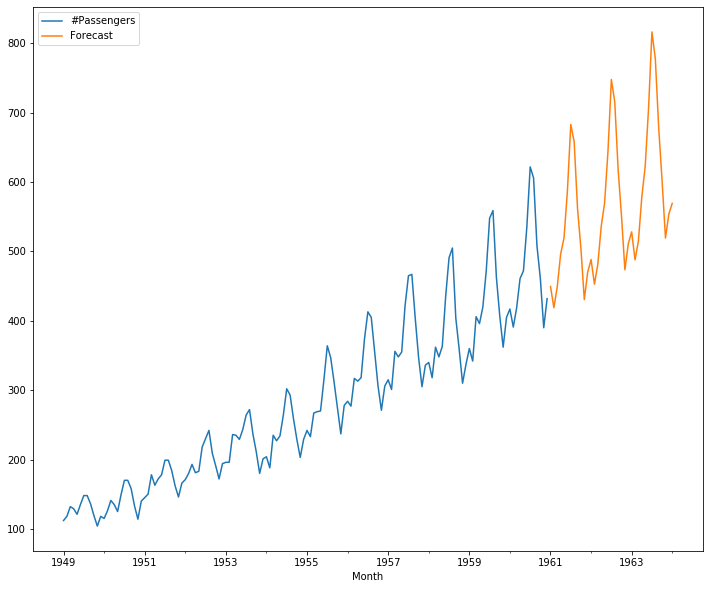

In [264]:
df1['#Passengers'].plot(legend=True,figsize=(12,10))
forecasted_values.plot(legend=True)

## AUTO-ARIMA

In [181]:
!pip install pmdarima

In [182]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [222]:
stepwise_fit=auto_arima(df1['#Passengers'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=True,trace=True,m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=1152.850, BIC=1164.702, Fit time=0.762 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.042 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1145.852, BIC=1157.703, Fit time=0.675 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.910 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1403.473, BIC=1412.361, Fit time=0.135 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=1146.202, BIC=1161.016, Fit time=1.940 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=1146.630, BIC=1161.444, Fit time=0.989 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=1146.562, BIC=1164.339, Fit time=2.329 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1152.734, BIC=1161.623, Fit time=0.530 seconds
Fit ARIMA: order=(2, 1, 0) s

In [223]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 12)   Log Likelihood                -563.907
Date:                            Tue, 12 May 2020   AIC                           1137.814
Time:                                    14:24:49   BIC                           1152.628
Sample:                                         0   HQIC                          1143.834
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0320      0.018      1.827      0.068      -0.002       0.066
ar.L1          0.7663      0.070     10.946      0.000       0.629       0.904
ma.L1         -0.9994      0.148     -6.749      0.000      -1.290      -0.709
ar.S.L12       0.9469      0.024     39.451      0.000       0.900       0.994
sigma2       130.2327     18.455      7.057      0.000      94.062     166.403
===================================================================================
Ljung-Box (Q):                       56.86   Jarque-Bera (JB):                23.99
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               3.37   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [224]:
# building model:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
model=ARIMA(train['#Passengers'],order=(1,1,1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  108
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -497.349
Method:                       css-mle   S.D. of innovations             23.880
Date:                Tue, 12 May 2020   AIC                           1002.698
Time:                        14:25:22   BIC                           1013.426
Sample:                    02-01-1949   HQIC                          1007.048
                         - 01-01-1958                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.4268      0.261      9.286      0.000       1.915       2.939
ar.L1.D.#Passengers     0.7419      0.067     11.091      0.000       0.611       0.873
ma.L1.D.#Passengers    -1.0000      0.025    -40.070      0.000      -1.049      -0.951
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3478           +0.0000j            1.3478            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [225]:
# predictions
predictions=results.predict(start,end,typ='levels').rename('ARIMA(1,1,1) Predictions')

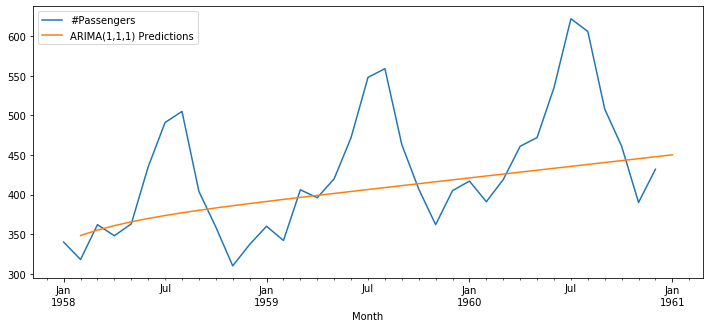

In [226]:
test['#Passengers'].plot(legend=True)
predictions.plot(legend=True)

In [227]:
from statsmodels.tools.eval_measures import rmse


In [228]:
error=rmse(test['#Passengers'],predictions)

In [230]:
error

71.37889813992145

In [231]:
test['#Passengers'].mean()

428.5

In [234]:
# Forecast into future
model=ARIMA(df1['#Passengers'],order=(1,1,1))
results=model.fit()
fcast=results.predict(start=len(df1),end=len(df1)+36,typ='levels').rename('ARIMA(1,1,1) forecast')

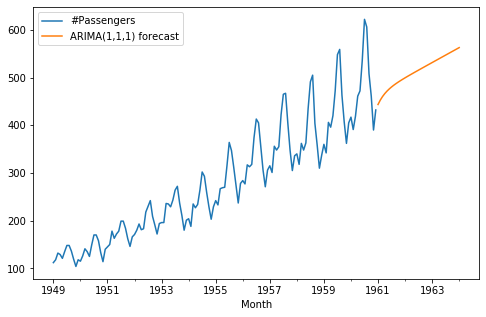

In [236]:
df1['#Passengers'].plot(legend=True,figsize=(8,5))
fcast.plot(legend=True)

# SARIMA

In [237]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [238]:
model=SARIMAX(train['#Passengers'],order=(1,1,1),seasonal_order=(1,0,0,12))
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  109
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 12)   Log Likelihood                -410.061
Date:                            Tue, 12 May 2020   AIC                            828.122
Time:                                    14:52:21   BIC                            838.850
Sample:                                01-01-1949   HQIC                           832.472
                                     - 01-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6335      0.332     -1.907      0.057      -1.285       0.018
ma.L1          0.4760      0.367      1.296      0.195      -0.244       1.196
ar.S.L12       0.9498      0.026     35.984      0.000       0.898       1.002
sigma2        89.7461     12.973      6.918      0.000      64.319     115.173
===================================================================================
Ljung-Box (Q):                       49.55   Jarque-Bera (JB):                 3.14
Prob(Q):                              0.14   Prob(JB):                         0.21
Heteroskedasticity (H):               2.23   Skew:                             0.42
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [239]:
predictions1=results.predict(start,end,typ='levels').rename('SARIMA Predictions')


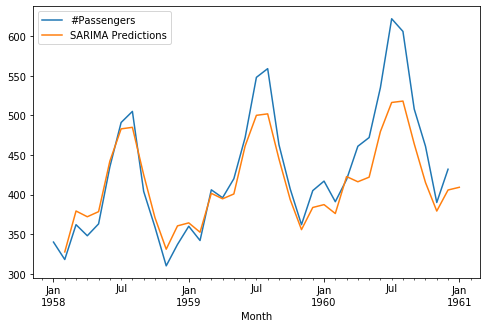

In [240]:
test['#Passengers'].plot(legend=True,figsize=(8,5))
predictions1.plot(legend=True)

In [241]:
error1=rmse(test['#Passengers'],predictions1)
error1

54.350611709559075

In [243]:
# Forecast into future
model=SARIMAX(df1['#Passengers'],order=(1,1,1),seasonal_order=(1,0,0,12))
results=model.fit()
fcast=results.predict(start=len(df1),end=len(df1)+36,typ='levels').rename('SARIMA Forecast')

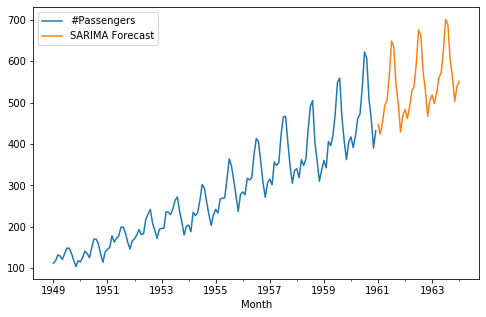

In [245]:
df1['#Passengers'].plot(legend=True,figsize=(8,5))
fcast.plot(legend=True)